## Statistics project

Simon Queric

deadline : 31/10/2022

In [2]:
import datetime
from IPython.display import display, Math

# We import useful libraries for data analysis

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('C_id_35_NuclearPowerAccidents2016-1.csv') 

In [4]:
df.head()

,Date,Location,Cost (millions 2013US$),INES,Smyth Magnitude,Region,Description,Fatalities
0,4/26/1986,"Kiev, Ukraine",259336.0,7.0,8.0,EE,Mishandled reactor safety test at Chernobyl nu...,4056
1,3/11/2011,"Fukushima Prefecture, Japan",166089.0,7.0,7.5,A,An earthquake and tsunami caused emergency bac...,573
2,12/8/1995,"Tsuruga, Japan",15500.0,NaN,NaN,A,Japan's only fast breeder reactor Monju suffer...,0
3,3/28/1979,"Middletown, Pennsylvania, United States",10910.0,5.0,7.9,NaN,Equipment failure and operator error contribut...,0
4,9/11/1957,"Rocky Flats, USA",8189.0,5.0,5.2,NaN,Fire starts and destroys plutonium processing ...,0


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
date = pd.to_datetime('1979/3/28') 
df = df[df['Date']< date]

In [6]:
df = df.rename(columns={'Cost (millions 2013US$)': 'Cost'})

## Exercise 1 : Statistical model

In [7]:
## Question 1 ##

df = df.dropna(subset=['Cost']) # We remove missing data
print('Number of observations :', len(df))

Number of observations : 55


(2) (a) Let $X \sim \mathcal{N}(\mu, \sigma^2)$, $X = \sigma Z + \mu $ where $Z \sim \mathcal{N}(0, 1)$ and $p\in [0,1]$, $x = F^{-1}_\theta(p)$. 

We have $\mathbb{P}(X \leqslant x) = \mathbb{P}(\sigma Z + \mu \leqslant x) = \mathbb{P}\left(Z \leqslant \frac{x - \mu}{\sigma}\right)$. Hence $F^{-1}_\theta(p) = \sigma F^{-1}_{(0, 1)}(p) + \mu$

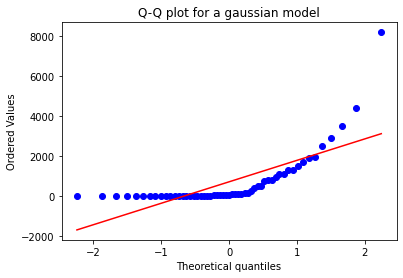

In [8]:
## Question 2.b ##

stats.probplot(df['Cost'], dist=stats.norm, plot=plt)
plt.title('Q-Q plot for a gaussian model')
plt.show()

(3) (a) Let $p\in[0,1]$, $X = \displaystyle\frac{Z}{\theta}$ where $Z \sim \mathcal{E}(1) $ and $x = F^{-1}_\theta(p)$. 

We have $\mathbb{P}(X \leqslant x) = \mathbb{P}(Z \leqslant \theta x)$. Hence $F_{\theta}^{-1}(p) = \displaystyle\frac{1}{\theta} F_1^{-1}(p)$

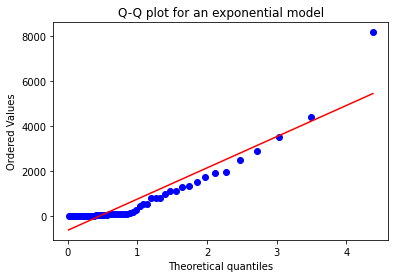

In [9]:
## Question 3.b ##

stats.probplot(df['Cost'], dist=stats.expon, plot=plt)
plt.title('Q-Q plot for an exponential model')
plt.show()

(4) We see that the Q-Q plot of data for a gaussian model is not a straight line (the points of the plot are far from the regression line) whereas the Q-Q plot of data for an exponential model is quite close from a straight line. Hence we can clearly suppose that the cost of nuclear accident doesn't follow a gaussian distribution. 
It's more likely that it follows an exponential distribution even if we can't be sure yet. In the next exercise, we take a look at the histogram of our data sample and we see that it actually looks like a such distribution.

## Exercise 2 : Point estimation

(1) We have $\widehat{\theta} = \text{argmax}_{\theta}{p_{\theta}(\textbf{x})}$ where $\textbf{x}$ are the values of the sample.

Hence $\displaystyle p_{\theta}(\textbf{x}) = \prod_{k=1}^n{\theta e^{-\theta x_k}} = \theta^ne^{-\theta \sum_{k=1}^n{x_k}}$

Hence $\displaystyle \widehat{\theta}(\textbf{x}) = \frac{n}{\sum_{i=1}^n{x_i}}$ 

In [10]:
print('estimation of theta :', 1/df['Cost'].mean())

estimation of theta : 0.0013767725947156967


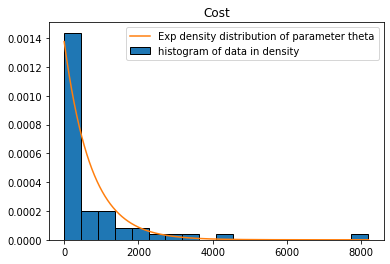

In [11]:
## Question 2 ##

x = np.linspace(0, 8200, 10000)
theta = 1/df['Cost'].mean()
y = theta*np.exp(-theta*x)
df.hist(column=['Cost'], bins='auto', grid=False, density=True, edgecolor="k")
plt.plot(x, y)
plt.legend(['Exp density distribution of parameter theta', 'histogram of data in density'])
plt.show()

 (3) We have $\mathbb{E}_{\theta}(\widehat{g}(X)) = \displaystyle\frac{1}{n}\sum_{i=1}^n{\mathbb{E}_{\theta}(X_i)} = \frac{1}{\theta}$ hence $\hat{g}$ is an efficient estimator of $g(\theta)$

In [12]:
## Question 4 ##

print('estimation of g(theta) :', df['Cost'].mean(), '10^6 $')

estimation of g(theta) : 726.3363636363636 10^6 $


(5) $R(\theta, \widehat{g}_{\eta}) = \bigg(\displaystyle\frac{1 - \eta}{\theta}\bigg)^2 + V(\widehat{g}_{\eta}(X))
= \bigg(\displaystyle\frac{1 - \eta}{\theta}\bigg)^2 + \frac{\eta^2}{n\theta^2}$

$R(\theta, \widehat{g}) = \displaystyle\frac{1}{n\theta^2}$

On dérive $f(\eta) = R(\theta, \hat{g}_{\eta}) - R(\theta, \hat{g})$ par rapport à $\eta$ : $f'(\eta) = \displaystyle\frac{2\eta}{n\theta^2} - \frac{2n(1-\eta)}{n\theta^2} \geqslant 0 $
Pour $\eta \geqslant\displaystyle\frac{n}{n+1}$

Le risque $R(\theta, \widehat{g}_{\eta})$ est donc plus petit que $R(\theta, \widehat{g})$ pour $\eta \in \left[\displaystyle\frac{n-1}{n+1}, 1\right]$




(6)  La médiane d'une loi exponentielle de paramètre $\theta$ est $\displaystyle\frac{ln{(2)}}{\theta}$ 

Et $\mathbb{E}(\widehat{g}_{\eta}) = \displaystyle\frac{\eta}{\theta}$ Ainsi, $\widehat{g}_{\eta}$ est un estimateur non biaisé de la médiane pour $\eta = \ln{(2)}$. 
En calculant $\widehat{g}_{\ln(2)}$ et la médiane empirique on observe une différence.

(7) D'après la question (5), pour $\frac{n-1}{n+1} \geqslant \ln(2)$ i.e pour $n \geqslant \frac{\ln(2) + 1}{1 - \ln(2)}$ i.e pour $n \geqslant 6$ le risque associé à $\widehat{g}$ est plus grand que le risque associé à $\widehat{g}_{\ln(2)}$.

In [13]:
print('estimateur g_ln(2) :', df['Cost'].mean() * np.log(2), '\nmédiane empirique :', df['Cost'].median())

estimateur g_ln(2) : 503.45800259270857 
médiane empirique : 89.9


## Exercise 3 : Hypothesis testing


1. The hypothesis are $H_0 = [0, 10^{-9}]$ and $H_1 = ]10^{-9}, \infty[$

2. Let $\theta' > \theta$ then $\displaystyle\frac{p_{\theta'}(x)}{p_{\theta}(x)} = \theta'^n\theta^{-n}\prod_{k=1}^n{e^{(\theta - \theta')x_k}} = \theta'^n\theta^{-n}e^{(\theta - \theta')\sum_{k=1}^n{x_k}}$ 

Posons $T(x) = \sum_{k=1}^n{x_k} $. Puisque nous sommes dans le cas d'un one-tailed test et que $y \mapsto e^{(\theta - \theta')y}$ est décroissante on pose : $\delta(x) = 1_{\{T(x) <c\}}$

3. On a $\alpha = \sup_{\theta\leqslant 10^{-9}}{\mathbb{P}_{\theta}\bigg(\displaystyle\sum_{k=1}^n{X_k} < c\bigg)}$ et $ \displaystyle\sum_{k=1}^n{X_k} \sim \Gamma(n, 1/\theta)$

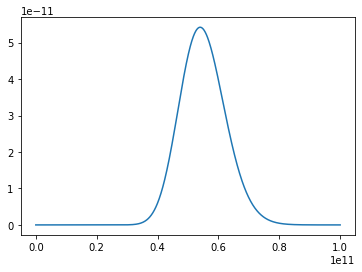

In [55]:
#define x-axis values
x = np.linspace (0, 10**11, 1000) 

#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=55, scale=10**9)

#create plot of Gamma distribution
plt.plot(x, y)

#display plot
plt.show()

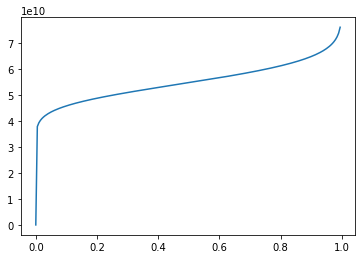

In [65]:
#calculate pdf of Gamma distribution for each x-value
y = stats.gamma(a=55, scale=10**9)

x_in = np.linspace(0,1,200) # 200 numbers in [0,1], input for ppf()
y_out = y.ppf(x_in)
plt.plot(x_in,y_out) # graphically check the results of the inverse CDF
plt.show()

In [64]:
print('alpha =', x_in[10], 'quantile =', y_out[10], '$') # 0.05-quantile pour une fonction Gamma(55, 10^-9) 

alpha = 0.05025125628140704 quantile = 789294460.8212315 $


In [59]:
## Test T(x) < c ##
c = y_out[10]

if df['Cost'].sum() * 10**6 < c :
    print('delta(x) = 1')
else : 
    print('delta(x) = 0')


delta(x) = 1


In [18]:
df['Cost'].sum()*10**6

39948500000.0

Ici, la p-value vaut $p = \mathbb{P}_{\theta=10^{-9}}(T(X) \leqslant T(x)) 
= \mathbb{P}_{\theta=10^{-9}}(T(X) \leqslant 39948.5\cdot 10^6)$

In [47]:
print('the p-value is :', x_in[3])

the p-value is : 0.01507537688442211


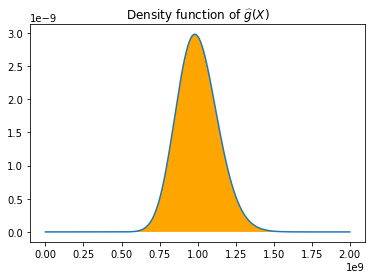

In [66]:
## Question 4 ##

#define x-axis values
x = np.linspace(0, 2*10**9, 1000) 
#calculate pdf of Gamma distribution for each x-value
y = stats.gamma.pdf(x, a=55, scale=10**9/55)

plt.plot(x, y)
plt.fill(x,y, 'orange')
plt.title('Density function of $\widehat{g}(X)$')
plt.show()

(4) For n = 55 samples and the parameter θ associated with an expected cost of one billion
dollars, plot the probability density function of ̂ g(X) and show the rejection region of
H0 at level α = 5%.

(5) Plot the power of the test at level α with respect to θ for n = 10, 50, 100, 1000 samples.
Explain the results.

(6) Propose a new test using the approximation of ̂ g(X) suggested by the Central Limit
Theorem and give the result of this test.

(5) The power of the test is $\beta(\theta) = \mathbb{P}_{\theta}(\delta(X) = 1) = \mathbb{P}_{\theta}\left(\sum_{k=1}^n{X_k} < c\right)$

In [60]:
c

43411195345.167725